# Importando os transcritos

In [1]:
from bs4 import BeautifulSoup

In [2]:
with open('alex_strangelove.txt', 'r') as file:
    html = file.read()

soup = BeautifulSoup(html, 'html.parser')

# Find all p elements with class 'script-line'
script_lines = soup.find_all('p', class_='script-line')

# Extract the text from each span inside the p elements
alex_phrases = []
for line in script_lines:
    phrase = ' '.join(span.get_text() for span in line.find_all('span'))
    alex_phrases.append(phrase)

In [3]:
with open('blue_is_the_warmest_color.txt', 'r') as file:
    html = file.read()

soup = BeautifulSoup(html, 'html.parser')

# Find all p elements with class 'script-line'
script_lines = soup.find_all('p', class_='script-line')

# Extract the text from each span inside the p elements
blue_phrases = []
for line in script_lines:
    phrase = ' '.join(span.get_text() for span in line.find_all('span'))
    blue_phrases.append(phrase)

In [4]:
with open('call_me_by_your_name.txt', 'r') as file:
    html = file.read()

soup = BeautifulSoup(html, 'html.parser')

# Find all p elements with class 'script-line'
script_lines = soup.find_all('p', class_='script-line')

# Extract the text from each span inside the p elements
call_me_phrases = []
for line in script_lines:
    phrase = ' '.join(span.get_text() for span in line.find_all('span'))
    call_me_phrases.append(phrase)

In [5]:
with open('love_simon.txt', 'r') as file:
    html = file.read()

soup = BeautifulSoup(html, 'html.parser')

# Find all p elements with class 'script-line'
script_lines = soup.find_all('p', class_='script-line')

# Extract the text from each span inside the p elements
love_simon_phrases = []
for line in script_lines:
    phrase = ' '.join(span.get_text() for span in line.find_all('span'))
    love_simon_phrases.append(phrase)

In [6]:
with open('the_danish_girl.txt', 'r') as file:
    html = file.read()

soup = BeautifulSoup(html, 'html.parser')

# Find all p elements with class 'script-line'
script_lines = soup.find_all('p', class_='script-line')

# Extract the text from each span inside the p elements
the_danish_girl_phrases = []
for line in script_lines:
    phrase = ' '.join(span.get_text() for span in line.find_all('span'))
    the_danish_girl_phrases.append(phrase)

In [7]:
with open('the_half_of_it.txt', 'r') as file:
    html = file.read()

soup = BeautifulSoup(html, 'html.parser')

# Find all p elements with class 'script-line'
script_lines = soup.find_all('p', class_='script-line')

# Extract the text from each span inside the p elements
the_half_of_it_phrases = []
for line in script_lines:
    phrase = ' '.join(span.get_text() for span in line.find_all('span'))
    the_half_of_it_phrases.append(phrase)

In [9]:
with open('the_portrait_of_a_lady_on_fire.txt', 'r') as file:
    html = file.read()

soup = BeautifulSoup(html, 'html.parser')

# Find all p elements with class 'script-line'
script_lines = soup.find_all('p', class_='script-line')

# Extract the text from each span inside the p elements
the_portrait_phrases = []
for line in script_lines:
    phrase = ' '.join(span.get_text() for span in line.find_all('span'))
    the_portrait_phrases.append(phrase)

# Reunindo todas as falas em uma única lista

In [10]:
all_phrases = the_portrait_phrases + the_half_of_it_phrases + the_danish_girl_phrases + love_simon_phrases + call_me_phrases + blue_phrases + alex_phrases

# Importando Bibliotecas

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import spacy
import gensim
from wordcloud import WordCloud
import os
from gensim.models import Word2Vec

# Tokenizando e Treinando o modelo W2V

In [12]:
nlp = spacy.load('en_core_web_sm')
sentences_token = []
for sentence in all_phrases:
    tokens = nlp(sentence)
    filtered_tokens = [t.lemma_ for t in tokens if 
                      t.is_alpha and \
                      not t.is_punct and \
                      not t.is_space and \
                      not t.is_stop and \
                      t.pos_ in ['NOUN', 'VERB', 'ADJ']]
    sentences_token.append(filtered_tokens)

In [13]:
new_queer_model = Word2Vec(
    sentences=sentences_token, 
    vector_size=200,  
    window=5,        
    min_count=5,    
    epochs=1,        
    workers=4
)

In [14]:
def wordcloud_related_nouns(word, savefig=False):
    related = new_queer_model.wv.most_similar(word, topn=100)
    nouns=[]
    for a in range(len(related)):
        tokens = nlp(related[a][0])
        for token in tokens:
            if token.pos_ == 'NOUN':
                nouns.append(related[a])
    dic = {word: value for word, value in nouns}
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dic)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    if savefig == True:
        nome_arquivo = f'{word}_related_nouns.png'
        plt.savefig(nome_arquivo, dpi=300, format='png')
    plt.show()

In [15]:
def wordcloud_related_nouns_two_words(word1, word2, savefig=False):
    related = new_queer_model.wv.most_similar(positive=[word1, word2], topn=100)
    nouns=[]
    for a in range(len(related)):
        tokens = nlp(related[a][0])
        for token in tokens:
            if token.pos_ == 'NOUN':
                nouns.append(related[a])
    dic = {word: value for word, value in nouns}
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dic)
    # Display the generated image
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    if savefig == True:
        nome_arquivo = f'{word1}_{word2}_related_nouns.png'
        plt.savefig(nome_arquivo, dpi=300, format='png')
    plt.show()

In [16]:
def wordcloud_related_adjs_(word,savefig=False):
    related = new_queer_model.wv.most_similar(word, topn=500)
    nouns=[]
    for a in range(len(related)):
        tokens = nlp(related[a][0])
        for token in tokens:
            if token.pos_ == 'ADJ':
                nouns.append(related[a])
    dic = {word: value for word, value in nouns}
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dic)
    # Display the generated image
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")  # Remove axes
    if savefig == True:
        nome_arquivo = f'{word}_related_adjs.png'
        plt.savefig(nome_arquivo, dpi=300, format='png')
    plt.show()

# WordClouds

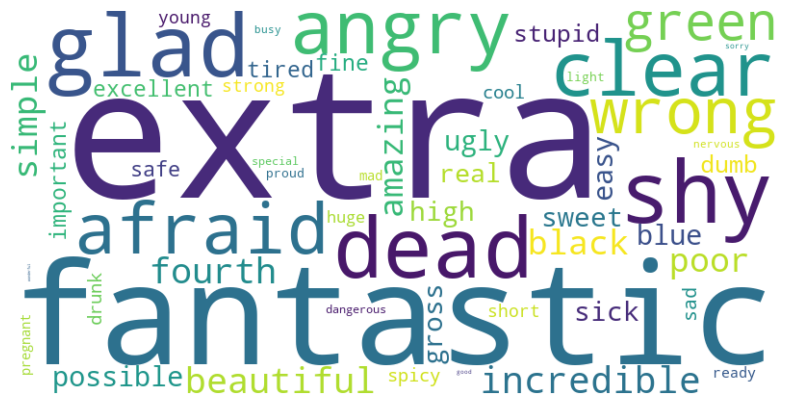

In [17]:
wordcloud_related_adjs_('gay', savefig=True)

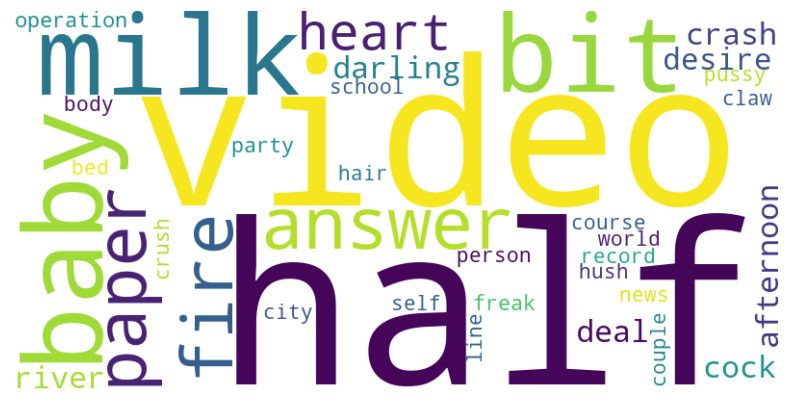

In [18]:
wordcloud_related_nouns_two_words('hot', 'gay', savefig=True)

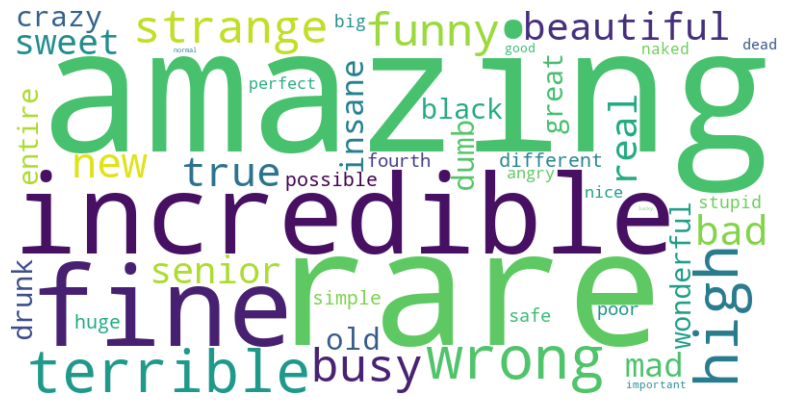

In [19]:
wordcloud_related_adjs_('lesbian', savefig=True)